## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [291]:
import pandas as pd
import numpy as np

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


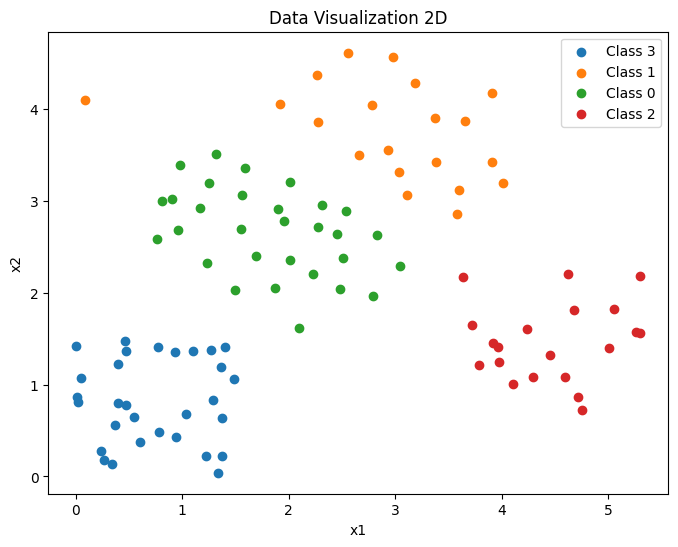

In [292]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [293]:
def forward_propagation(X, V, W):
    """
    Perform forward propagation through the neural network.
    
    Parameters:
    -----------
    X : array-like
        Input data of shape (n_samples, n_features)
    V : array-like
        Weight matrix for hidden layer
    W : array-like
        Weight matrix for output layer
    
    Returns:
    --------
    dict
        Dictionary containing:
        - X_bar: Input data with bias term
        - X_bar_bar: Input to hidden layer
        - F: Hidden layer activation
        - F_bar: Hidden layer output with bias
        - F_bar_bar: Input to output layer
        - G: Network output
        - E: Error value (if y_true is provided)
    """
    # Add bias term to input
    X_bar = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Hidden layer
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))  # sigmoid activation
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    
    # Output layer
    G = 1 / (1 + np.exp(-F_bar_bar))  # Sigmoid activation
    
    # Store all intermediate values
    results = {
        'X_bar': X_bar,
        'X_bar_bar': X_bar_bar,
        'F': F,
        'F_bar': F_bar,
        'F_bar_bar': F_bar_bar,
        'G': G
    }
    
    return results

# Define network parameters
N = 2  # input features
K = 4  # hidden neurons
J = len(data['y'].unique())  # output classes

# Initialize weights
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Prepare input data
X = data[['x1', 'x2']].values

# Perform forward propagation
results = forward_propagation(X, V, W)

X_bar = results['X_bar']

# Calculate error if needed
y_one_hot = np.eye(J)[data['y'].astype(int)]
E = 0.5 * np.sum((results['G'] - y_one_hot) ** 2)
print(f"Error: {E:.4f}")

Error: 68.1928


## Step 4: back propagation


In [294]:
# Define the learning rates
alpha_1, alpha_2 = 10**-3, 10**-3

# Define the number of iterations
iterations = 0

# Define a threshold
threshold = 10**-2

# Define an error array
errors = [10**-5,E]



In [295]:
def backpropagation(V_BP, W_BP, X_bar_BP, F_BP, F_bar_BP, G_BP, y_one_hot_BP, alpha_1_BP, alpha_2_BP):

    # Step 1: Calculate output layer error
    delta_G = G_BP * (1 - G_BP) * (G_BP - y_one_hot_BP)
    
    # Step 2: Calculate hidden layer error
    
    # First, get the term coming from the next layer
    dGxWT = np.dot(delta_G, W_BP.T)
    
    # Calculate δf while excluding the bias thats why we do * back_term[:, 1:]
    delta_F = F_BP * (1 - F_BP) * dGxWT[:, 1:]
    
    # Step 3: Calculate gradients
    
    # For output layer weights (W)
    dE_dW = np.dot(F_bar_BP.T, delta_G)
    
    # For hidden layer weights (V)
    dE_dV = np.dot(X_bar_BP.T, delta_F)
    
    # Step 4: Update weights
    
    # Update W and V using gradient descent
    W_new = W_BP - alpha_1_BP * dE_dW
    V_new = V_BP - alpha_2_BP * dE_dV
    
    return W_new, V_new


In [296]:
while abs(errors[-1] - errors[-2]) > threshold:
    
    iterations += 1
    
    # Backpropagation and weight updates
    W, V = backpropagation(V, W, X_bar, F, F_bar, G, y_one_hot, alpha_1, alpha_2)
    
    # Forward propagation
    results = forward_propagation(X, V, W)
    X_bar_bar = results['X_bar_bar']
    F = results['F']
    F_bar = results['F_bar']
    F_bar_bar = results['F_bar_bar']
    G = results['G']
    
    # Calculate errors
    E = 0.5 * np.sum((G - y_one_hot) ** 2)
    errors.append(E)
    
    if iterations % 100 == 0:
        print(f"Iteration {iterations}, Error: {E}")
        
# Final results
print("\nFinal Error:", errors[-1])
print("Number of iterations:", len(errors))
    


Iteration 100, Error: 36.01279912816205
Iteration 200, Error: 31.245902186996723
Iteration 300, Error: 28.995513641198638
Iteration 400, Error: 26.841889970430337
Iteration 500, Error: 24.82694413044265
Iteration 600, Error: 23.253937969853062
Iteration 700, Error: 22.063543806538952

Final Error: 21.512540223164706
Number of iterations: 755


## Step 5: Plotting the errors

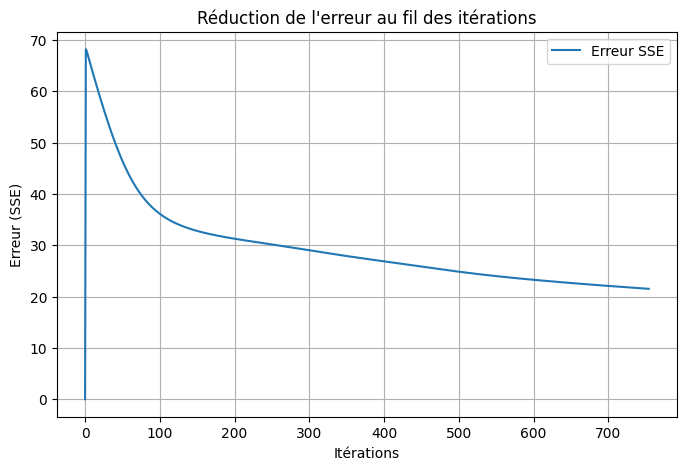

In [297]:
# Tracer la réduction de l'erreur
plt.figure(figsize=(8, 5))
plt.plot(errors, label="Erreur SSE")
plt.xlabel("Itérations")
plt.ylabel("Erreur (SSE)")
plt.title("Réduction de l'erreur au fil des itérations")
plt.legend()
plt.grid()
plt.show()

## Step 6: Optimal parameters

Optimal Parameters for Hidden Layer (V):
----------------------------------------

V matrix shape: (3, 4)
            h1        h2        h3        h4
bias  0.857483  1.728021 -0.971677 -0.321157
x1   -0.494009 -0.910095  0.479730  0.893353
x2    0.529028 -0.316477  1.365011 -1.281038

Interpretation:
- Rows: Input nodes (bias, x1, x2)
- Columns: Hidden layer neurons (h1 to h4)


Optimal Parameters for Output Layer (W):
----------------------------------------

W matrix shape: (5, 4)
       output1   output2   output3   output4
bias -0.666401 -0.331313 -0.765175 -0.606592
h1    0.122767  1.149505 -0.998467 -0.384930
h2    0.081357 -2.389527 -1.508671  3.111206
h3    0.115203 -0.483678  0.068069 -1.547064
h4   -0.888198 -1.283061  1.820148  1.105854

Interpretation:
- Rows: Hidden layer nodes (bias + hidden neurons)
- Columns: Output layer neurons

Weight Statistics:
------------------

Hidden Layer (V):
Mean weight: 0.1298
Weight std: 0.9377
Min weight: -1.2810
Max weight: 1.7280

Outp

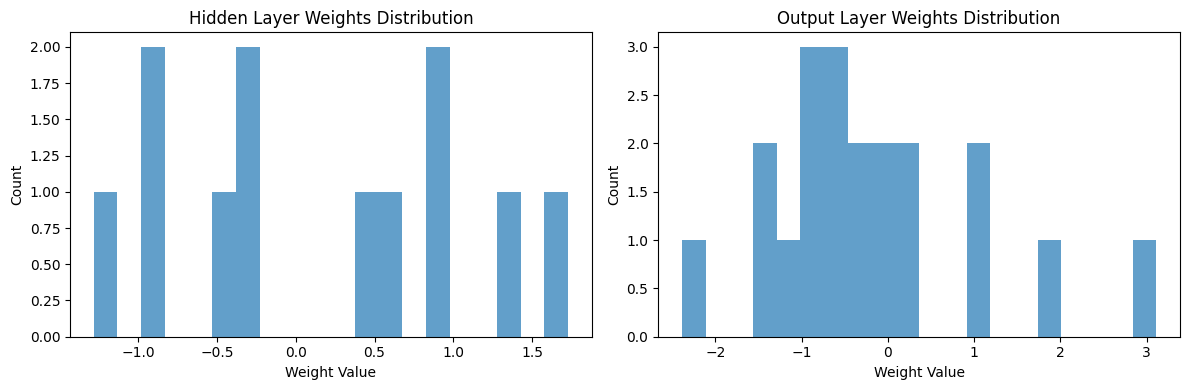


Input Feature Importance:
------------------------
x1: 0.6943
x2: 0.8729


In [298]:
def display_optimal_parameters(V, W):
    # Format V weights (hidden layer)
    print("Optimal Parameters for Hidden Layer (V):")
    print("----------------------------------------")
    v_df = pd.DataFrame(V, 
                       index=['bias', 'x1', 'x2'],
                       columns=[f'h{i+1}' for i in range(V.shape[1])])
    print("\nV matrix shape:", V.shape)
    print(v_df)
    print("\nInterpretation:")
    print("- Rows: Input nodes (bias, x1, x2)")
    print("- Columns: Hidden layer neurons (h1 to h4)")
    
    print("\n\nOptimal Parameters for Output Layer (W):")
    print("----------------------------------------")
    w_df = pd.DataFrame(W,
                       index=['bias'] + [f'h{i+1}' for i in range(V.shape[1])],
                       columns=[f'output{i+1}' for i in range(W.shape[1])])
    print("\nW matrix shape:", W.shape)
    print(w_df)
    print("\nInterpretation:")
    print("- Rows: Hidden layer nodes (bias + hidden neurons)")
    print("- Columns: Output layer neurons")
    
    # Additional Analysis
    print("\nWeight Statistics:")
    print("------------------")
    print("\nHidden Layer (V):")
    print(f"Mean weight: {V.mean():.4f}")
    print(f"Weight std: {V.std():.4f}")
    print(f"Min weight: {V.min():.4f}")
    print(f"Max weight: {V.max():.4f}")
    
    print("\nOutput Layer (W):")
    print(f"Mean weight: {W.mean():.4f}")
    print(f"Weight std: {W.std():.4f}")
    print(f"Min weight: {W.min():.4f}")
    print(f"Max weight: {W.max():.4f}")
    
    # Visualize weight distributions
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(121)
    plt.hist(V.flatten(), bins=20, alpha=0.7)
    plt.title('Hidden Layer Weights Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Count')
    
    plt.subplot(122)
    plt.hist(W.flatten(), bins=20, alpha=0.7)
    plt.title('Output Layer Weights Distribution')
    plt.xlabel('Weight Value')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Call the function with the optimal weights
display_optimal_parameters(V, W)

# Calculate and display the importance of input features
print("\nInput Feature Importance:")
print("------------------------")
input_importance = np.abs(V[1:, :]).mean(axis=1)  # Exclude bias row
features = ['x1', 'x2']
for feature, importance in zip(features, input_importance):
    print(f"{feature}: {importance:.4f}")

## Step 7: plotting training outputs values vs Predicted values

Classification Accuracy: 98.00%


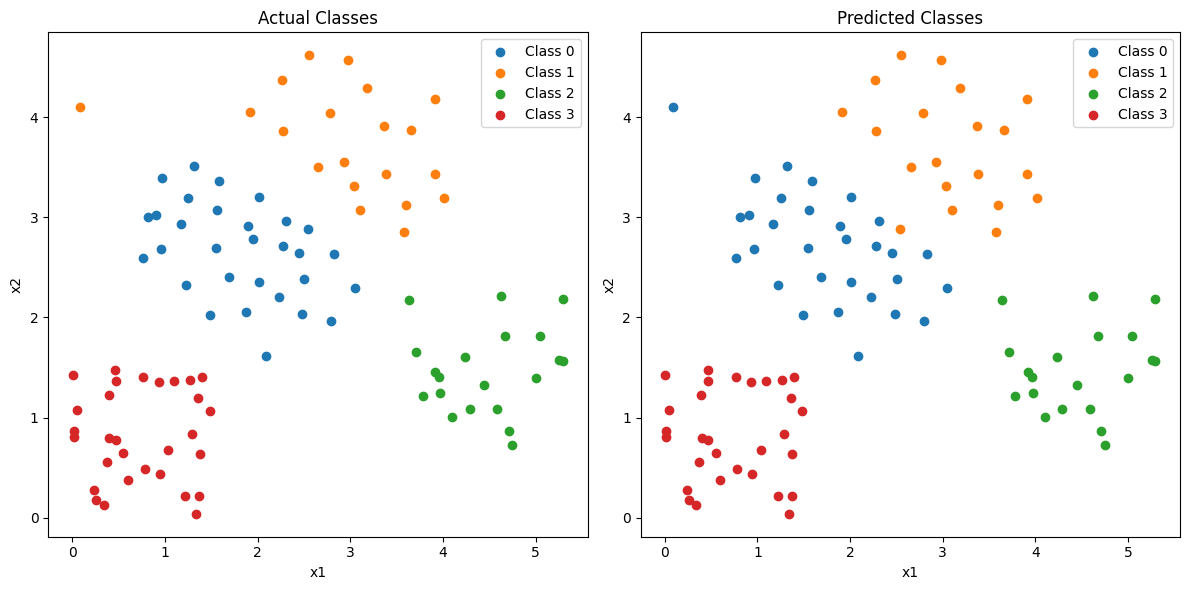


Detailed Comparison (first 10 samples):
Sample	Actual	Predicted
------------------------------
0	3	3
1	3	3
2	3	3
3	3	3
4	3	3
5	3	3
6	3	3
7	3	3
8	3	3
9	3	3


In [299]:
# Get predictions
def predict(X_bar, V, W):
    # Forward pass
    X_bar_bar = np.dot(X_bar, V)
    F = 1 / (1 + np.exp(-X_bar_bar))
    F_bar = np.hstack((np.ones((F.shape[0], 1)), F))
    F_bar_bar = np.dot(F_bar, W)
    G = 1 / (1 + np.exp(-F_bar_bar))
    return G

# Get predictions for training data
predicted_outputs = predict(X_bar, V, W)
predicted_classes = np.argmax(predicted_outputs, axis=1)
actual_classes = data['y'].values

# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Plot predicted vs actual classes
plt.figure(figsize=(12, 6))

# Plot actual classes
plt.subplot(121)
for label in np.unique(actual_classes):
    mask = actual_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Actual Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Plot predicted classes
plt.subplot(122)
for label in np.unique(predicted_classes):
    mask = predicted_classes == label
    plt.scatter(X[mask, 0], X[mask, 1], label=f'Class {label}')
plt.title('Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Comparison (first 10 samples):")
print("Sample\tActual\tPredicted")
print("-" * 30)
for i in range(10):
    print(f"{i}\t{actual_classes[i]}\t{predicted_classes[i]}")

## Step 8: Testing the model with values


Test Results:
------------------------------------------------------------
Test Point (x1, x2) | Predicted Class | Class Probabilities
------------------------------------------------------------
T1: (0.0, 0.0)   | Class 3      | 0.299 0.097 0.123 0.859
T2: (2.0, 2.0)   | Class 0      | 0.339 0.257 0.189 0.261
T3: (4.0, 4.0)   | Class 1      | 0.360 0.440 0.224 0.103
T4: (4.5, 1.5)   | Class 2      | 0.220 0.166 0.602 0.247


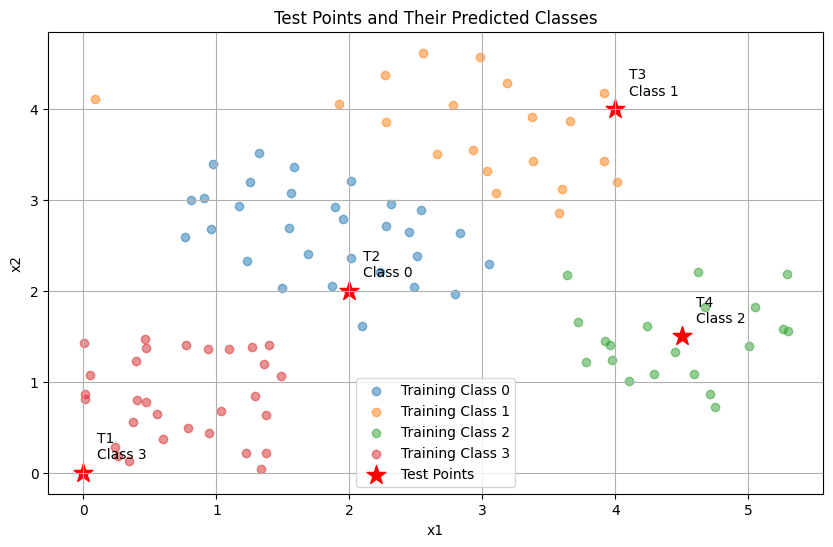


Prediction Confidences:
----------------------------------------
Test Point 1: 0.859
Test Point 2: 0.339
Test Point 3: 0.440
Test Point 4: 0.602


In [300]:
import numpy as np
import matplotlib.pyplot as plt

# Test data points
X_test = np.array([
    [0, 0],    # Test point 1
    [2, 2],    # Test point 2
    [4, 4],    # Test point 3
    [4.5, 1.5] # Test point 4
])

# Perform forward propagation on test data
test_output = forward_propagation(X_test, V, W)

# Get predicted classes
predicted_classes = np.argmax(test_output['G'], axis=1)

# Print results
print("\nTest Results:")
print("-" * 60)
print("Test Point (x1, x2) | Predicted Class | Class Probabilities")
print("-" * 60)

for i, (point, pred_class, probs) in enumerate(zip(X_test, predicted_classes, test_output['G'])):
    prob_str = ' '.join([f'{p:.3f}' for p in probs])
    print(f"T{i+1}: ({point[0]:.1f}, {point[1]:.1f})   | Class {pred_class}      | {prob_str}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plot training data
for label in np.unique(data['y']):
    mask = data['y'] == label
    plt.scatter(data[mask]['x1'], data[mask]['x2'], 
               alpha=0.5, label=f'Training Class {label}')

# Plot test points
plt.scatter(X_test[:, 0], X_test[:, 1], 
           color='red', marker='*', s=200, 
           label='Test Points')

# Add annotations for test points
for i, (x, y) in enumerate(X_test):
    plt.annotate(f'T{i+1}\nClass {predicted_classes[i]}', 
                (x, y), xytext=(10, 10), 
                textcoords='offset points')

plt.title('Test Points and Their Predicted Classes')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Calculate prediction confidence
confidences = np.max(test_output['G'], axis=1)
print("\nPrediction Confidences:")
print("-" * 40)
for i, conf in enumerate(confidences):
    print(f"Test Point {i+1}: {conf:.3f}")

## Step 9: Plot classification results